In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
real_estate_data=pd.read_csv("Real_Estate.csv")
real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [3]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [4]:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [5]:
describe=real_estate_data.describe()
describe

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


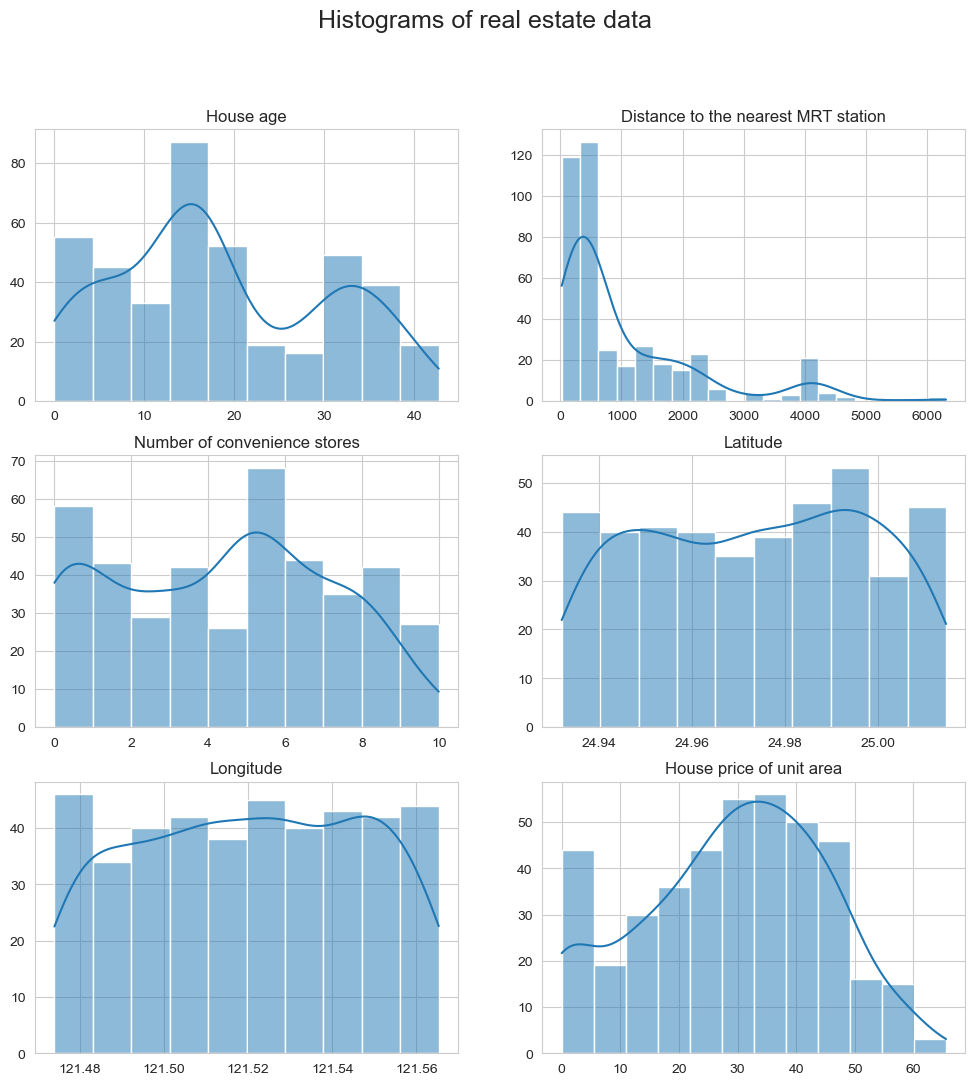

In [6]:
sns.set_style("whitegrid")
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(12,12))
fig.suptitle('Histograms of real estate data',fontsize=18)
cols=['House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude','House price of unit area']
#plotting Histograms:
for i,col in enumerate(cols):
    sns.histplot(real_estate_data[col],kde=True,ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(col)
    axes[i//2,i%2].set_xlabel('')
    axes[i//2,i%2].set_ylabel('')
plt.show()

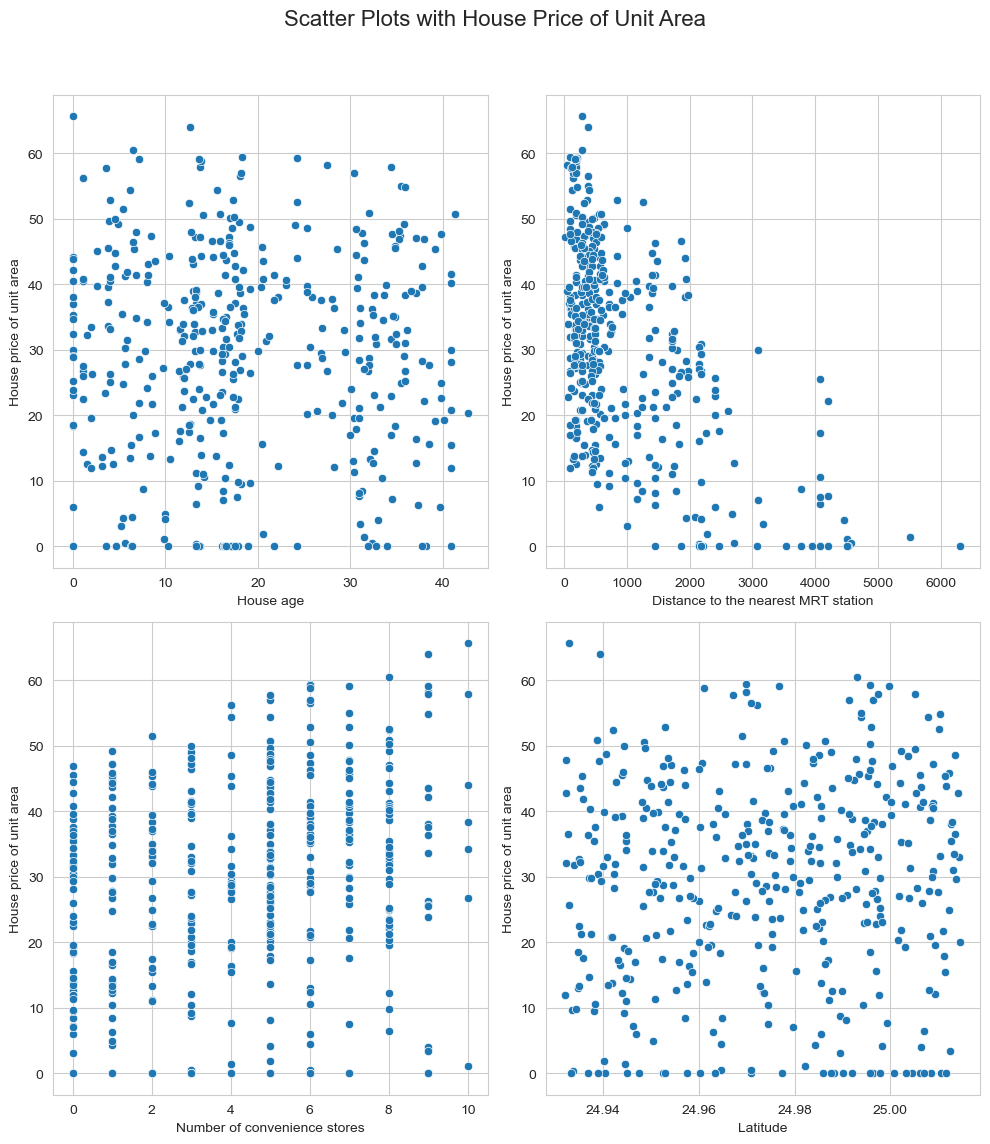

In [7]:
# Scatter plots to observe the relationship with house price
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,12))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)
# Scatter plot for each variable against the house price
sns.scatterplot(data=real_estate_data,x="House age",y="House price of unit area",ax=axes[0,0])
sns.scatterplot(data=real_estate_data,x="Distance to the nearest MRT station",y="House price of unit area",ax=axes[0,1])
sns.scatterplot(data=real_estate_data,x="Number of convenience stores",y="House price of unit area",ax=axes[1,0])
sns.scatterplot(data=real_estate_data,x="Latitude",y="House price of unit area",ax=axes[1,1])
#Adjusting the layout of the subplots to prevent overlap and ensure they fit properly within the figure area.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Axes: >

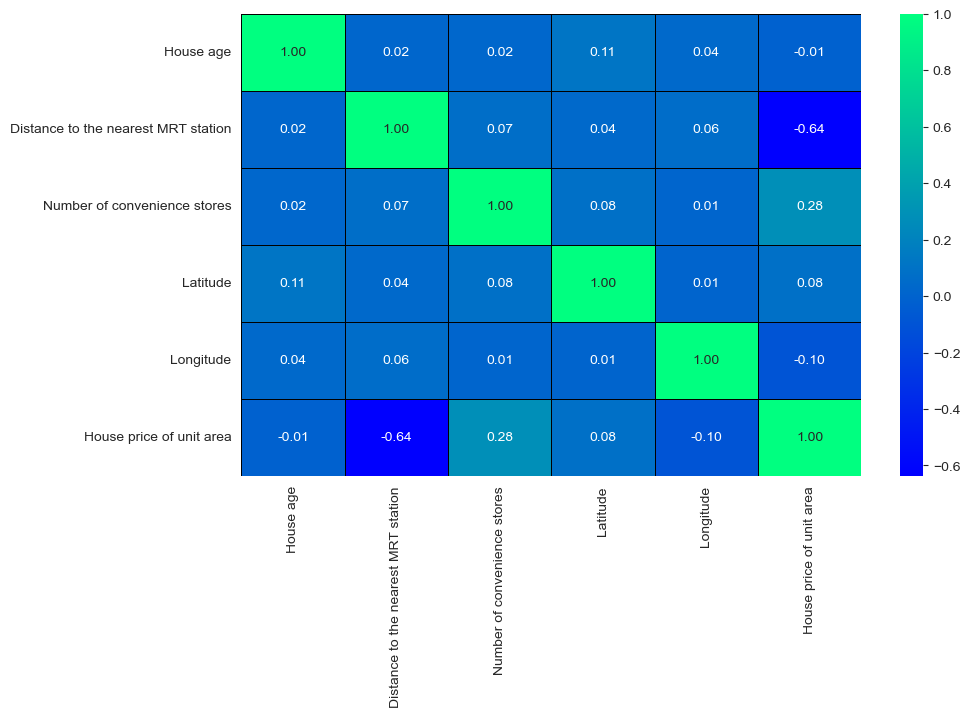

In [8]:
correlation_matrix=real_estate_data.drop("Transaction date",axis=1).corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,cmap='winter',annot=True,fmt=".2f",linewidths=.5,linecolor="k")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.matrics import mean_squared_error,r2_score

In [10]:
feature=['Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude']
target='House price of unit area'
x=real_estate_data[feature]
y=real_estate_data[target]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(x_test)

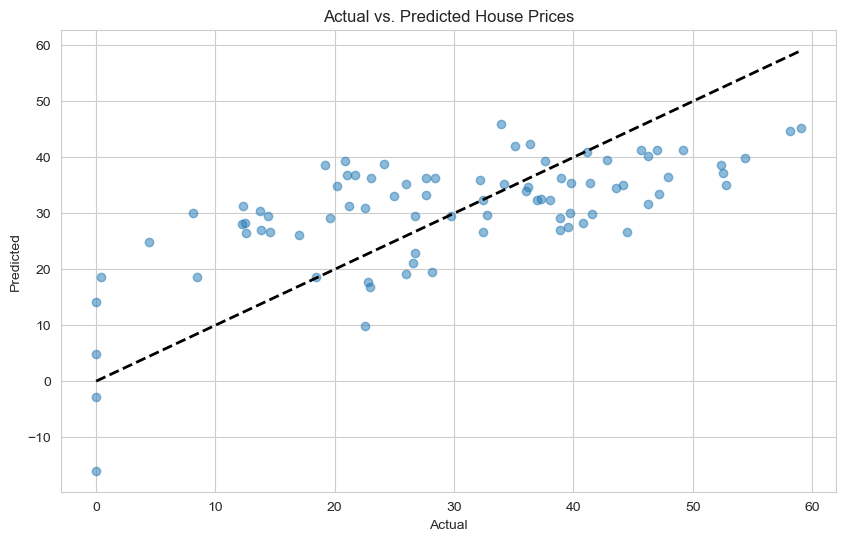

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()